# Autoencoders
- **Autoencoders are neural networks that try to exactly reproduce their own input**

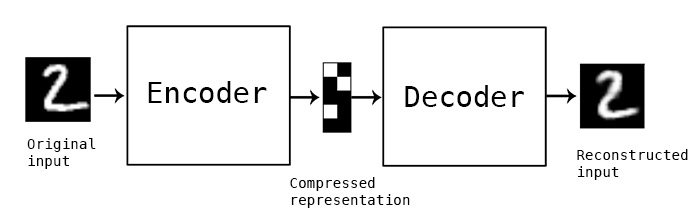

“Autoencoding” is a data compression algorithm where the compression and decompression functions are:

- data-specific
- lossy
- learned automatically from examples rather than engineered by a human.

In almost all contexts where the term “autoencoder” is used, the compression and decompression functions are implemented with neural networks.

## What are autoencoders used for?
The main applications are:

### Stacked autoencoders
- Stacked autoencoders reduce the dimensions of your input data. This can be used for dimensionality reduction (often combined with t-SNE to visualize data).

When you have plenty of unlabeled data but few labeled data points, the encoding layer(s) can be reused for semisupervised learning.

Stacked Autoencoders were used for layer-wise pretraining of neural networks, but it turned out that better random weight initialization and batch normalization allow to train even very deep networks from scratch.

### Denoising autoencoders
If the encoded representation has less features than the input data, the autoencoder is called undercomplete. Encoding automatically loses information.

This can be used to remove noise from the input.

### Variational autoencoder (VAE)
Variational autoencoders add constraints to the encoding, so that the learned encoding corresponds to a probability distribution.

By sampling points from that distribution, you can generate new data. Therefore, VAEs are interesting as a generative model.

## Example
Source: https://blog.keras.io/building-autoencoders-in-keras.html


(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.3669 - val_loss: 0.2716
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2643 - val_loss: 0.2532
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2427 - val_loss: 0.2303
Epoch 4/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2227 - val_loss: 0.2129
Epoch 5/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2079 - val_loss: 0.2002
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1968 - val_loss: 0.1906
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1882 - val_loss: 0.1830
Epoch 8/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1811 - val_loss: 0.1763
Epoch 9/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.174

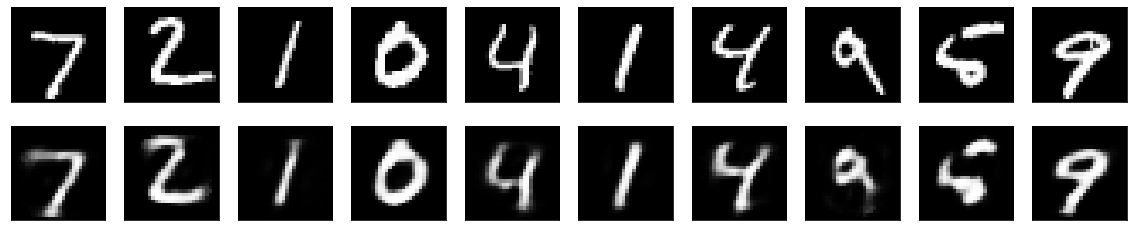

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

encoding_dim = 32

#--------------------------------------------
# Model 1: autoencoder = encoder + decoder

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

#--------------------------------------------
# Model 2: separate encoder

encoder = Model(input_img, encoded)

#--------------------------------------------
# Model 3: separate decoder

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

#--------------------------------------------

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

#-----------------------------------------
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# --------------------------------------------------

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()